***
# Analysis of Website Traffic To Develop Ideas On How To Increase The Links' Clickrates
***

In this project, The client has provided the data set (traffic.csv) which contains web traffic data ("**events**") from a few different pages ("**links**") over a period of 7 days including various categorical dimensions about the geographic origin of that traffic as well as a page's content: **isrc**. The client wants to understand the traffic better, in particular the volume and distribution of events, and to develop ideas how to increase the links' clickrates. We are tasked with analyzing the data using Python libraries to develop ideas on how to increase the links' clickrates.

***
#### We Start By Importing The Necessary Libraries, Importing And Inspecitng The Data.
***

Import the necessary libraries.

In [2]:
# Import libraries
import pandas as pd
from scipy.stats import pearsonr

Next we load the dataset provided by the client to understand its structure. We'll inspect the first few rows to see what columns are available and their respective data types.

In [3]:
# Load the dataset
file_path = 'traffic.csv'
data = pd.read_csv(file_path)

# Display the firest few rows to understand the structure
data.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


***
#### Total Pageview Events and Pageviews Per Day.
***

We need to filter the data for pageview events, count the total number of these events, and then group them by date to count the number of pageviews per day.

In [21]:
# Filter for pageview events
pageview_events = data[data['event'] == 'pageview']

# Calculate the total number of pageview events
total_pageviews = pageview_events.shape[0]

# Calculate the number of pageviews per day
pageviews_per_day = pageview_events.groupby('date').size().reset_index(name = 'pageviews')

total_pageviews

142015

The total number of pageview events recorded in the dataset is: **142015**

The pageviews per day is shown below

In [19]:
pageviews_per_day

,date,pageviews
0,2021-08-19,22366
1,2021-08-20,21382
2,2021-08-21,21349
3,2021-08-22,20430
4,2021-08-23,18646
5,2021-08-24,18693
6,2021-08-25,19149


***
#### Totals For Other Recorded Events.
***

We'll now calculate the total number of each event in the dataset to see how they compare in volume. We will group the event type and count the occurrences.

In [15]:
# Count the total number of each type of event
event_counts = data.groupby('event').size().reset_index(name = 'count')

The dataset contains three types of events: `click`, `pageview`, and `preview`. Below are the total counts for each:

In [16]:
event_counts

,event,count
0,click,55732
1,pageview,142015
2,preview,28531


***
#### Identifying Countries From Which Pageviews Originated And Sorting For The Top 10 Countries With The Highest Number Of Pageviews.
***

To determine which countries the pageviews originated from, we'll filter the data for pageview events and then group by the `country` to count the number of pageviews per country.

In [24]:
# Filter for pageview countries
pageview_countries = pageview_events.groupby('country').size().reset_index(name = 'pageviews')

# Sort by pageviews in descending order to see the top countries
pageview_countries_sorted = pageview_countries.sort_values(by = 'pageviews', ascending = False)

# Display the top 10 countries
pageview_countries_sorted.head(10)

,country,pageviews
166,Saudi Arabia,28873
88,India,27286
201,United States,20839
65,France,9674
91,Iraq,4897
200,United Kingdom,3845
145,Pakistan,3212
71,Germany,3141
194,Turkey,2462
199,United Arab Emirates,2335


***
#### The Overall Click Rate.
***

The overall click rate is calculated as the ratio of the total number of clicks to the total number of pageviews.

In [26]:
# Calculate the overall click rate
total_clicks = data[data['event'] == 'click'].shape[0]
click_rate = total_clicks / total_pageviews

click_rate

0.3924374185825441

The overall click rate is approximately **0.39** or 39%. This means that about 39% of the pageviews resulted in a click.

In [8]:
data.head(2)

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


***
#### Analyze The Clickrate Distribution Across Different Links.
***

In [33]:
# Group by linkid and calculate the total pageviews and clicks for each link
link_grouped = data.groupby(['linkid', 'event']).size().unstack(fill_value = 0)

# Calculate click rate for each link
link_grouped['click_rate'] = link_grouped['click'] / link_grouped['pageview']
link_grouped = link_grouped.reset_index()

# Sort by click rate in descending order
link_grouped_sorted = link_grouped.sort_values(by = 'click_rate', ascending = False)

# Display the top 10 links by click rate
link_grouped_sorted.head(10)

event,linkid,click,pageview,preview,click_rate
1280,54166799-1895-4f35-9b2f-b249c2f7a351,1,0,0,inf
2669,aee2b83d-5f50-4309-9e62-200c404d4751,1,0,0,inf
3029,c95f1fc1-fab0-4c74-b3f5-52bd3684a713,923,10,0,92.3
614,27a91fe1-9fc0-5c28-9e9e-19ff0e7357a7,3,1,0,3.0
792,330773a6-f22a-5c7a-a3e4-7809fe8539b9,3,1,0,3.0
932,3d0e78ec-d580-49a0-ae97-2e11992c411a,2,1,0,2.0
3100,ce1b3b95-7acd-5adb-a30c-bc0483369c7c,2,1,0,2.0
1051,443e9e83-0c42-50e6-b3a6-06fc264d6144,2,1,0,2.0
3003,c722cabc-3e9b-5ab5-9243-c0dc23524e42,2,1,0,2.0
2463,a0f03518-1d88-56ab-a808-24c3b6bf7661,2,1,0,2.0


The click rate varies significantly across different links. Some links have very high click rates, and a few even haave a cick rate of  of infinity `inf`, which occurs when there are clicks recorded but no pageviews (likely due to data collection errors). Below is a breakdown of some of the highest click rates:

* Link with ID `c95f1fc1-fab0-4c74-b3f5-52bd3684a713` has a click rate of **92.3** (923 clicks out of 10 pageviews).
* Other links have click rates of **2.0** to **3.0**, which indicates that for every pageview, there are 2 to 3 clicks.

***
#### Test For Correlation Between Clicks And Previews.
***

To determine if there's a correlation between the number of clicks and previews, we'll use the Pearson correlation coefficient. This will help us understand whether there's a linear relationship between these two variables.

In [35]:
# Import libraries
from scipy.stats import pearsonr

# Filter out links with zero pageviews to avoid division by zero in the click rate calculation
filtered_link_grouped = link_grouped[link_grouped['pageview'] > 0]

# Calculate the correlation between clicks and previews
correlation, p_value = pearsonr(filtered_link_grouped['click'], filtered_link_grouped['preview'])

correlation, p_value

(0.9886586147026568, 0.0)

The Pearson correlation coefficient between the number of clicks and previews is 0.99, whith a p-value of 0.0. This indicates a very strong positive correlation between clicks and previews, suggesting that as the number of previews increases, the number of clicks also tends to increase. The p-value being essentially zero indicates that this correlation is statistically significant.

***
#### Identifying The Countries With The Highest Click Rate.
***

To determine which countries had the highest click rate, we'll group the data by the `country` column, calculate the total number of pageviews and clicks for each country, and then compute the click rate. We'll then sort the results to find the countries with the highest click rates.

In [37]:
# Group by country and calculate the total pageviews and clicks for each country
country_grouped = data.groupby(['country', 'event']).size().unstack(fill_value = 0)

# Calculate click rate for each country
country_grouped['click_rate'] = country_grouped['click'] / country_grouped['pageview']
country_grouped = country_grouped.reset_index()

# Sort by click rate in descending order
country_grouped_sorted = country_grouped.sort_values(by = 'click_rate', ascending = False)

# display the top countries by click rate
top_countries = country_grouped_sorted[['country', 'click_rate']].head(10)
top_countries

event,country,click_rate
90,Iran,1.500000
146,Palau,1.000000
206,Wallis and Futuna,1.000000
175,Solomon Islands,1.000000
38,Central African Republic,1.000000
155,Principality of Monaco,1.000000
79,Guernsey,1.000000
163,Saint Martin,1.000000
122,Marshall Islands,1.000000
110,Liberia,0.916667


These insights suggest strong user engagement in these countries, making them potentially valuable targets for further marketing efforts or content optimization strategies.

***
#### Visualizing Click Rates Over Time.
***

To visualize how click rates change over time, we need to group the data by date, calculate the total clicks and pageviews for each day, and then compute the click rate for each day. Finally, we can plot these click rates over the time period to see trends or patterns.

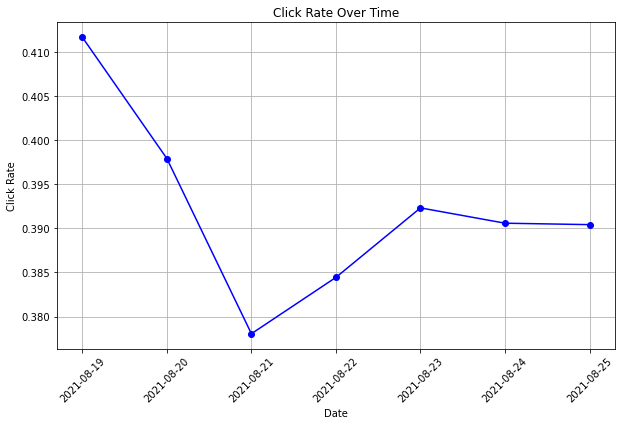

In [39]:
# Import graphics libraries
import matplotlib.pyplot as plt

# Group by date and calculate the total pageviews and clicks for each day
date_grouped = data.groupby(['date', 'event']).size().unstack(fill_value = 0)

# Calculate click rate for each day
date_grouped['click_rate'] = date_grouped['click'] / date_grouped['pageview']
date_grouped = date_grouped.reset_index()

# Plot theh click rates over time
plt.figure(figsize = (10, 6))
plt.plot(date_grouped['date'], date_grouped['click_rate'], marker = 'o', linestyle = '-', color = 'blue')
plt.title('Click Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Click Rate')
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

***
#### Click Rate Over Time.
***

The plot above shows how the click rate has changed over time across the days in the dataset:

The click rate started around 0.41 on 2021-08-19 and showed a decreasing trend until 2021-08-21, where it dropped to around 0.38. After 2021-08-21, the click rate increased slightly, peaking again on 2021-08-23 at around 0.395 before stabilizing. This visualization helps us understand the fluctuations in user engagement over time. By analyzing what occurred on specific dates, such as marketing campaigns or content changes, we can correlate these events with changes in the click rate and adjust strategies accordingly.

***
#### Recommendations on how the client can increase click rate.
***

Improving the click rate involves a combination of understanding user behavior, optimizing content, and refining the user experience. Here are several strategies to consider:

##### Optimize Content Placement and Design
* Call-to-Action (CTA): Ensure that CTAs are clear, compelling, and strategically placed. Use action-oriented language like "Discover Now" or "Learn More."
* Link Visibility: Make sure the links are prominent and easy to find. Consider using contrasting colors, larger fonts, or buttons to draw attention.
* Content Relevance: Ensure that the content surrounding the link is relevant to the user's needs or interests. The more aligned the content is with what users are looking for, the more likely they are to click.

##### Improve Page Load Speed
* Optimize Images and Media: Compress images and media files to reduce load times. Slow-loading pages can cause users to leave before clicking on links.
* Minimize Redirects: Reduce the number of redirects to decrease load times.

##### Target the Right Audience
* Segmentation: Use data analytics to understand who is clicking on links and who isn’t. Tailor content and links to different audience segments to make them more relevant.
* Geo-targeting: Since you know which countries drive the most pageviews, tailor your content or promotional efforts to cater to the preferences of these audiences.

##### A/B Testing
* Experiment with Variations: Test different versions of your pages, links, CTAs, and layouts. For example, change the wording, color, or placement of links to see what drives more clicks.
* Ease of Use: Make sure that links are easy to tap on mobile devices, avoiding elements that are too small or close together.

##### Increase Engagement Through Personalization
* Dynamic Content: Use dynamic content to show different links to different users based on their behavior, preferences, or past interactions.
* Recommendations: Recommend related content or products based on the user’s browsing history or profile data to increase relevance and likelihood of clicks.

##### Leverage Analytics for Continuous Improvement
* Track User Behavior: Use analytics tools to track how users interact with your links. Understand the user journey and identify drop-off points where users might lose interest.
* Heatmaps: Implement heatmaps to visualize where users are clicking most on your pages. This can help you place links in the areas that receive the most attention.

##### Provide Incentives
* Exclusive Offers: Provide exclusive offers, discounts, or early access to encourage clicks. Make sure these incentives are prominently displayed and communicated.
* Content Upgrades: Offer additional resources, such as downloadable content or guides, in exchange for clicks or other forms of engagement.

##### Improve Content Quality
* Engaging Headlines: Craft compelling and attention-grabbing headlines that make users want to click through to learn more.
* High-Quality Visuals: Use engaging visuals, videos, or infographics that entice users to interact with the content.

##### Reduce Distractions
* Minimalist Design: Simplify your page design to reduce distractions. A cluttered page can overwhelm users and decrease the likelihood of clicks.
* Focused Content: Ensure that each page or section has a clear focus, guiding the user towards the desired action (clicking the link).

By implementing these strategies, the client can effectively increase the click rate on the website links, leading to higher engagement and potentially more conversions.

***
#### Conclusion.
***

Through this analysis, we have:

* Determined the total pageview events and their distribution across the days.
* Analyzed the total counts for other events, including clicks and previews.
* Identified the top countries from which pageviews originated.
* Calculated the overall click rate and analyzed how it varies across different links.
* Found a strong and significant correlation between the number of clicks and previews, suggesting a relationship between these variables.
* Calculated the overall click rate and analyzed how it varies over time.

These insights can help the client understand their web traffic better and develop strategies to improve link click rates by targeting content with high preview engagement or optimizing traffic sources from high-performing countries.